In [1]:
import os, sys
from tqdm import trange, tqdm

import math
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import simulate


source = "../source"
sys.path.append(source)

from data_analysis.visualization.publication import pub_show
from simulate import rep_sim

In [2]:
data_path = "../DNN/data/"

properties = pd.read_csv(
    data_path + "amazing data/properties simple.txt", sep=" ", header=0
)
Y = properties.to_numpy().T

features = [
    ([Y[0], Y[1]], [Y[2], Y[3]]),
    ([Y[0]], [Y[1]]),
    ([Y[2]], [Y[3]]),
]

dys = [
    np.sum(
        [
            np.linalg.norm(y_2 - y_1) ** 2 / (len(Y_1) * len(Y_2))
            for y_1 in Y_1
            for y_2 in Y_2
        ]
    )
    for Y_1, Y_2 in features
]

N = len(Y)

In [3]:
dys = [np.linalg.norm(Y[n_2] - Y[n_1]) ** 2 for n_1 in range(N) for n_2 in range(n_1)]

In [12]:
data_path = "../DNN/data/"

properties = pd.read_csv(data_path + "amazing data/properties.txt", sep=" ", header=0)
Y = properties.to_numpy().T

features = [
    ([Y[0], Y[1], Y[2]], [Y[3], Y[4]]),
    ([Y[0], Y[1]], [Y[2]]),
    ([Y[0]], [Y[1]]),
    ([Y[3]], [Y[4]]),
]

features = [
    ([Y[2]], [Y[0], Y[1], Y[3], Y[4]]),
    ([Y[0], Y[1]], [Y[3], Y[4]]),
    ([Y[0], Y[1]], [Y[2]]),
    ([Y[0]], [Y[1]]),
    ([Y[3]], [Y[4]]),
]

dys = [
    np.sum(
        [
            np.linalg.norm(y_2 - y_1) ** 2 / (len(Y_1) * len(Y_2))
            for y_1 in Y_1
            for y_2 in Y_2
        ]
    )
    for Y_1, Y_2 in features
]
N = len(Y)

In [13]:
dys

[5.0, 8.0, 5.5, 1.0, 2.9999999999999996]

In [14]:
data_path = "../DNN/data/"

properties = pd.read_csv(
    data_path + "Rogers McClelland/Table B1.txt", sep=" ", header=0
)
Y = properties.to_numpy().T

features = [
    ([Y[0], Y[1], Y[2], Y[3]], [Y[4], Y[5], Y[6], Y[7]]),
    ([Y[0], Y[1]], [Y[2], Y[3]]),
    ([Y[4], Y[5]], [Y[6], Y[7]]),
    ([Y[0]], [Y[1]]),
    ([Y[2]], [Y[3]]),
    ([Y[4]], [Y[5]]),
    ([Y[6]], [Y[7]]),
]

dys = [
    np.sum(
        [
            np.linalg.norm(y_2 - y_1) ** 2 / (len(Y_1) * len(Y_2))
            for y_1 in Y_1
            for y_2 in Y_2
        ]
    )
    for Y_1, Y_2 in features
]
N = len(Y)

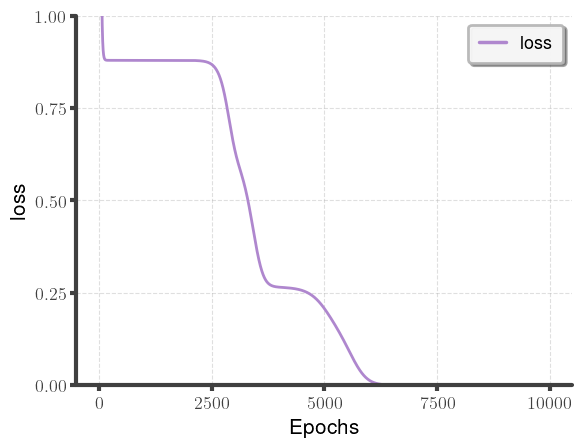

In [21]:
## Comparison

eta_h, eta_y = 0.0020877677068522342, 0.10208116909174215  # default
f = 10
eta_h, eta_y = eta_h / f, eta_y / f

eta_y_mean = 3 * eta_y

# epochs = np.arange(10000)

dx2 = 2
w0 = 0
D0 = 1e-10

h0 = D0 * dx2
y0 = D0**2 * dx2

y0_mean = y0 + np.max(dys)


t_max = 10000
t = np.linspace(0, t_max, 10000)


def get_z(dy2):
    sol = scipy.integrate.solve_ivp(
        simulate.der,
        [0, t_max],
        [h0, y0, w0],
        args=[eta_h, eta_y, dx2, dy2],
        dense_output=True,
    )
    z = sol.sol(t)
    return z


fig, ax = plt.subplots()

losses = []
for dy2 in dys:
    z = get_z(dy2)
    loss = simulate.loss(t, z, eta_y_mean, dy2, y0_mean)
    losses.append(loss)
    # plt.plot(t, loss, label=f"{dy2:.2f}")
loss_total = np.sum(losses, axis=0) * (1 / N)

plt.plot(t, loss_total, label=f"loss", color="#AF87CE")

ax.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.ylim(0, 1)
# plt.show()
pub_show(colors="gradient")